# Média Móvel 

A média móvel é uma técnica simples e intuitiva para suavizar séries temporais e fazer previsões. Ela é particularmente útil para eliminar ruídos ou variações curtas, revelando tendências e padrões subjacentes. No entanto, sua aplicabilidade como modelo de previsão depende da natureza dos dados.

## Como funciona? 

A média móvel é calculada como a média de um determinado número de pontos de dados consecutivos. Existem várias formas de médias móveis, mas as duas mais comuns são:

</br>

### Móvel Simples (SMA - Simple Moving Average): É a média simples de um número fixo de valores anteriores.
$$
SMA_t = \frac{1}{n} \sum_{i=0}^{n-1} Y_{t-i}
$$

**Onde:**
- $SMA_t$ é a média móvel no tempo $t$.
- $n$ é o número de períodos usados para calcular a média.
- $Y_{t-i}$ são os valores da série temporal nos $n$ períodos anteriores.
- 
</br>

### Média Móvel Exponencial (EMA - Exponential Moving Average): Dá mais peso aos valores mais recentes, ajustando-se mais rapidamente às mudanças.
$$
EMA_t = \alpha Y_t + (1-\alpha) EMA_{t-1}
$$

**Onde:**
- $EMA_t$ é a média móvel exponencial no tempo $t$.
- $\alpha$ é o fator de suavização, calculado como $\alpha = \frac{2}{n+1}$.
- $Y_t$ é o valor atual da série temporal no tempo $t$.
- $EMA_{t-1}$ é o valor da média móvel exponencial no tempo $t-1$.

## Pontos Negativos

Previsões de Curto Prazo: A média móvel é melhor para previsões de curto prazo e suavização de dados. Para previsões de longo prazo, modelos mais complexos como ARIMA, SARIMA ou modelos baseados em aprendizado de máquina podem ser mais eficazes.

Não Captura Sazonalidade ou Tendências Complexas: A média móvel não lida bem com padrões sazonais ou tendências complexas, pois simplesmente suaviza os dados sem modelar explicitamente esses componentes.

Impacto de Gaps e Falhas: Embora a média móvel possa ajudar em séries com gaps e falhas, essas irregularidades ainda podem comprometer a precisão das previsões. Preenchimento dos gaps antes de aplicar a média móvel pode melhorar os resultados.

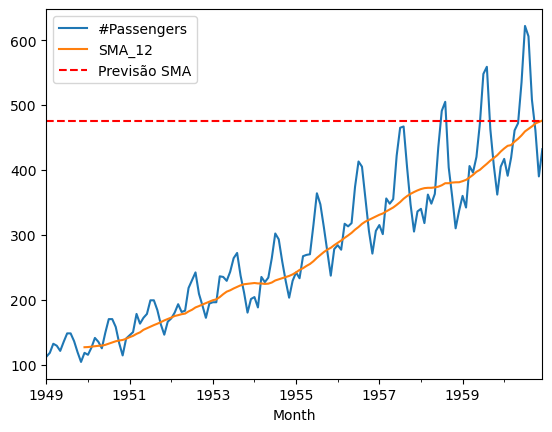

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('airpassengers.csv', index_col='Month', parse_dates=True)

# Aplicar a média móvel simples
df['SMA_12'] = df['#Passengers'].rolling(window=12).mean()

# Prever o próximo valor
last_12_months = df['#Passengers'][-12:]
forecast_sma = last_12_months.mean()

# Visualizar os dados e a média móvel
df[['#Passengers', 'SMA_12']].plot()
plt.axhline(y=forecast_sma, color='red', linestyle='--', label='Previsão SMA')
plt.legend()
plt.show()

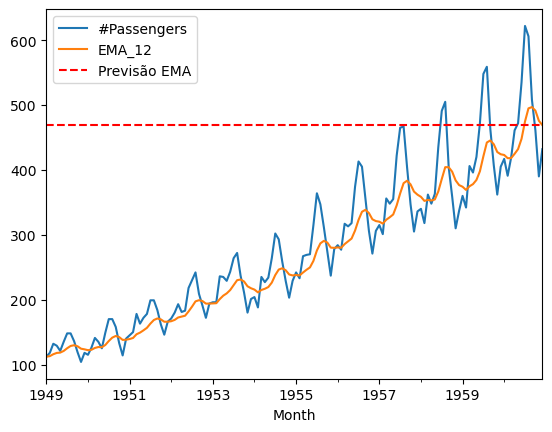

In [3]:
# Aplicar a média móvel exponencial
df['EMA_12'] = df['#Passengers'].ewm(span=12, adjust=False).mean()

# Prever o próximo valor
forecast_ema = df['EMA_12'].iloc[-1]  # O valor da EMA mais recente

# Visualizar os dados e a média móvel exponencial
df[['#Passengers', 'EMA_12']].plot()
plt.axhline(y=forecast_ema, color='red', linestyle='--', label='Previsão EMA')
plt.legend()
plt.show()

## Suavização Exponencial


Suavização exponencial é uma técnica de previsão que utiliza uma média ponderada de observações passadas para prever valores futuros. Ela dá maior peso às observações mais recentes, enquanto as mais antigas recebem menos peso, o que a torna útil para séries temporais onde as condições mudam ao longo do tempo.

- Considera que observações passadas *possuem* peso

- Quanto mais recente a observação, maior seu peso

- Faz por média, quanto mais distante a observação menor a média

- Os pesos de cada observação reduz a medida que aumenta-se o lag

###  - Suavização Exponencial Simples (SES) - É, simplesmente a média ponderada de observações passadas. Serve bem a séries temporais sem tendência ou sazonalidade. Lembre-se que o peso decresce a medida que prevemos para mais longe. Simplesmente é extrapolado seu valor.

**Fórmula da Suavização Exponencial Simples:**

$$
F_{t+1} = \alpha \cdot Y_t + (1 - \alpha) \cdot F_t
$$

**Onde:**

- $F_{t+1}$ é a previsão para o próximo período.
- $Y_t$ é o valor observado no período atual.
- $F_t$ é a previsão anterior.
- $\alpha$ é o fator de suavização, onde $0 \leq \alpha \leq 1$.

### - Hold Linear Trend - suavização exponencial para dados com tendência (porém a previsão cresce ao infinito)

**Fórmulas da Suavização Exponencial Holt Linear Trend:**

1. **Nível:**

   $$
   L_t = \alpha \cdot Y_t + (1 - \alpha) \cdot (L_{t-1} + T_{t-1})
   $$

2. **Tendência:**

   $$
   T_t = \beta \cdot (L_t - L_{t-1}) + (1 - \beta) \cdot T_{t-1}
   $$

3. **Previsão:**

   $$
   F_{t+m} = L_t + m \cdot T_t
   $$

**Onde:**

- $L_t$ é o nível no tempo $t$.
- $T_t$ é a tendência no tempo $t$.
- $Y_t$ é o valor observado no tempo $t$.
- $F_{t+m}$ é a previsão para $m$ períodos à frente.
- $\alpha$ é o fator de suavização para o nível, onde $0 \leq \alpha \leq 1$.
- $\beta$ é o fator de suavização para a tendência, onde $0 \leq \beta \leq 1$.
- $m$ é o número de períodos à frente que se deseja prever.


### - Tendência amortecida (ele amortece a previsão ad infinitum de Hold Linear por um novo parâmetro chamado de *param de amortecimento*)

**Fórmulas da Suavização Exponencial Holt Linear Trend Amortecida:**

1. **Nível:**

   $$
   L_t = \alpha \cdot Y_t + (1 - \alpha) \cdot (L_{t-1} + \phi \cdot T_{t-1})
   $$

2. **Tendência:**

   $$
   T_t = \beta \cdot (L_t - L_{t-1}) + (1 - \beta) \cdot \phi \cdot T_{t-1}
   $$

3. **Previsão:**

   $$
   F_{t+m} = L_t + \left(\frac{1 - \phi^m}{1 - \phi}\right) \cdot T_t
   $$

**Onde:**

- $L_t$ é o nível no tempo $t$.
- $T_t$ é a tendência no tempo $t$.
- $Y_t$ é o valor observado no tempo $t$.
- $F_{t+m}$ é a previsão para $m$ períodos à frente.
- $\alpha$ é o fator de suavização para o nível, onde $0 \leq \alpha \leq 1$.
- $\beta$ é o fator de suavização para a tendência, onde $0 \leq \beta \leq 1$.
- $\phi$ é o fator de amortecimento da tendência, onde $0 \leq \phi \leq 1$.
- $m$ é o número de períodos à frente que se deseja prever.


#### *Modelos Hold Linear trend e Damped são úteis quando não há sazonalidade*

### - Holt Winters Sazonal - inclui captura de sazonalidade pelo modelo. Comporta modelos *Aditivos* para variação sazonal constante e *Multiplicativo* para modelos que a sazonalidade varia ao longo da série

#### Aditivo: Adequado quando a variação sazonal é constante ao longo do tempo (sazonalidade tem amplitude constante).

**Fórmulas da Suavização Exponencial Holt-Winters Aditivo:**

1. **Nível:**

   $$
   L_t = \alpha \cdot \left(Y_t - S_{t-s}\right) + (1 - \alpha) \cdot (L_{t-1} + T_{t-1})
   $$

2. **Tendência:**

   $$
   T_t = \beta \cdot (L_t - L_{t-1}) + (1 - \beta) \cdot T_{t-1}
   $$

3. **Sazonalidade:**

   $$
   S_t = \gamma \cdot \left(Y_t - L_t\right) + (1 - \gamma) \cdot S_{t-s}
   $$

4. **Previsão:**

   $$
   F_{t+m} = L_t + m \cdot T_t + S_{t+m-s(k+1)}
   $$

**Onde:**

- $L_t$ é o nível no tempo $t$.
- $T_t$ é a tendência no tempo $t$.
- $S_t$ é o componente sazonal no tempo $t$.
- $Y_t$ é o valor observado no tempo $t$.
- $F_{t+m}$ é a previsão para $m$ períodos à frente.
- $\alpha$ é o fator de suavização para o nível, onde $0 \leq \alpha \leq 1$.
- $\beta$ é o fator de suavização para a tendência, onde $0 \leq \beta \leq 1$.
- $\gamma$ é o fator de suavização para a sazonalidade, onde $0 \leq \gamma \leq 1$.
- $s$ é o comprimento da sazonalidade (número de períodos em um ciclo sazonal).
- $k$ é o número de ciclos sazonais completos dentro dos $m$ períodos de previsão.

#### Multiplicativo: Usado quando a amplitude da sazonalidade aumenta ou diminui proporcionalmente ao nível da série (sazonalidade com amplitude variável).

**Fórmulas da Suavização Exponencial Holt-Winters Multiplicativo:**

1. **Nível:**

   $$
   L_t = \alpha \cdot \left(\frac{Y_t}{S_{t-s}}\right) + (1 - \alpha) \cdot (L_{t-1} + T_{t-1})
   $$

2. **Tendência:**

   $$
   T_t = \beta \cdot (L_t - L_{t-1}) + (1 - \beta) \cdot T_{t-1}
   $$

3. **Sazonalidade:**

   $$
   S_t = \gamma \cdot \left(\frac{Y_t}{L_t}\right) + (1 - \gamma) \cdot S_{t-s}
   $$

4. **Previsão:**

   $$
   F_{t+m} = \left(L_t + m \cdot T_t\right) \cdot S_{t+m-s(k+1)}
   $$

**Onde:**

- $L_t$ é o nível no tempo $t$.
- $T_t$ é a tendência no tempo $t$.
- $S_t$ é o componente sazonal no tempo $t$.
- $Y_t$ é o valor observado no tempo $t$.
- $F_{t+m}$ é a previsão para $m$ períodos à frente.
- $\alpha$ é o fator de suavização para o nível, onde $0 \leq \alpha \leq 1$.
- $\beta$ é o fator de suavização para a tendência, onde $0 \leq \beta \leq 1$.
- $\gamma$ é o fator de suavização para a sazonalidade, onde $0 \leq \gamma \leq 1$.
- $s$ é o comprimento da sazonalidade (número de períodos em um ciclo sazonal).
- $k$ é o número de ciclos sazonais completos dentro dos $m$ períodos de previsão.


### - ETS -> suporta sazonalidade e tendência. Nele voce informa o erro, a tendência e a sazonalidade 

Permite a especificação do comportamento de cada componente, resultando em modelos como ETS(A,A,A) (Erro Aditivo, Tendência Aditiva, Sazonalidade Aditiva), ou ETS(M,A,M) (Erro Multiplicativo, Tendência Aditiva, Sazonalidade Multiplicativa), e assim por diante.


In [4]:
stock = pd.read_csv('all-stocks-2006-01-01-to-2018-01-01.csv',
                    index_col='Date', parse_dates=['Date'])

In [5]:
g_stk = stock.query('Name == "GOOGL"')

In [6]:
g_stk = g_stk.copy()

# essa coluna irá servir para ordernar os dados
g_stk['Ticks'] = range(0, len(g_stk))

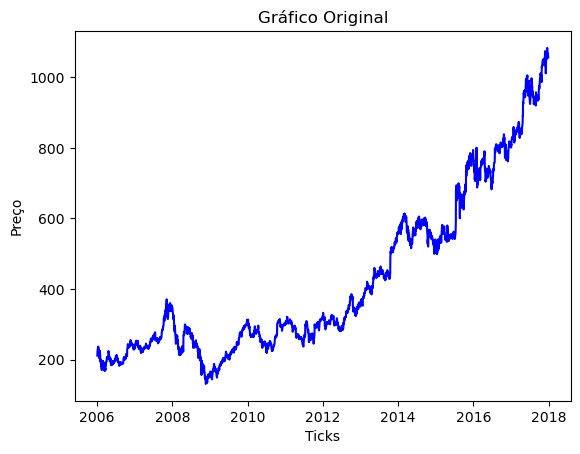

In [7]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Preço')
ax1.set_title('Gráfico Original')
ax1.plot('Open', data=g_stk, color='b')

In [8]:
g_stk['Rolling_mean'] = g_stk['Open'].rolling(window=80).mean() #suavizando dados para avaliar a tendência

Text(0.5, 1.0, 'Média Móvel')

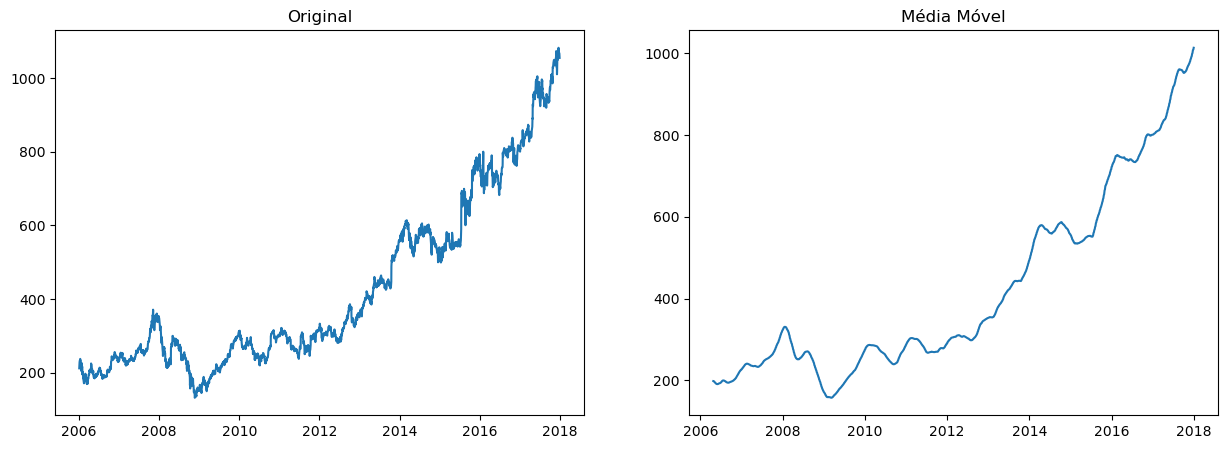

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].plot('Open', data=g_stk)
axes[0].set_title('Original')
 
axes[1].plot('Rolling_mean', data=g_stk)
axes[1].set_title('Média Móvel')

In [14]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

### Suavização Exponencial Simples

In [13]:
from datetime import datetime

def dateparse(dates): return datetime.strptime(dates, '%Y-%m')

data = pd.read_csv('AirPassengers.csv', parse_dates=[
                   'Month'], index_col='Month', date_parser=dateparse)
data.index.freq = 'MS' #preciso setar a frequencia da sua série temporal, lembre-se

C:\Users\Luis Henrique\AppData\Local\Temp\ipykernel_2828\311303763.py:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('AirPassengers.csv', parse_dates=[


In [15]:
data.index.freq = 'MS'  # é preciso mostrar a frequencia dos dados - MS é mensal
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(12) #prevendo 12 meses a frente

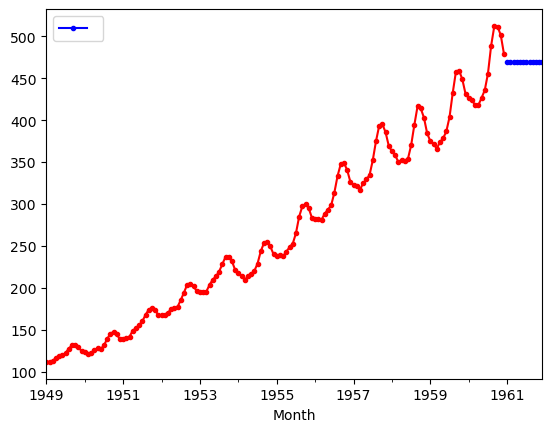

In [16]:
fcast1.plot(marker='.', color='b', legend=True)
fit1.fittedvalues.plot(marker='.', color='red') #preencher valores em branco com fittedvalues visto que quando usamos a suavização, alguns dados anteiores ficam blank()
plt.show()

In [17]:
# smoothing_tren (beta) 80% de influência na tendência mais atual
fit2 = Holt(data).fit(smoothing_level=0.2,
                      smoothing_trend=0.8, optimized=False)
fcast2 = fit2.forecast(12)

<Axes: xlabel='Month'>

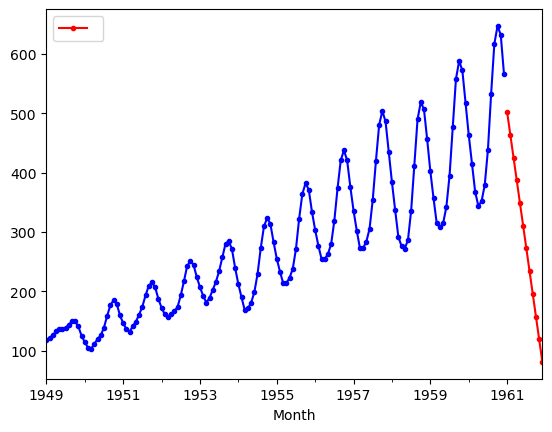

In [18]:
fit2.fittedvalues.plot(marker='.', color='b')
fcast2.plot(color='r', marker='.', legend=True)

### Suavizada

In [19]:
fit3 = Holt(data, damped_trend=True).fit(
    smoothing_level=0.2, smoothing_trend=0.8)
fcast3 = fit3.forecast(12)

<Axes: xlabel='Month'>

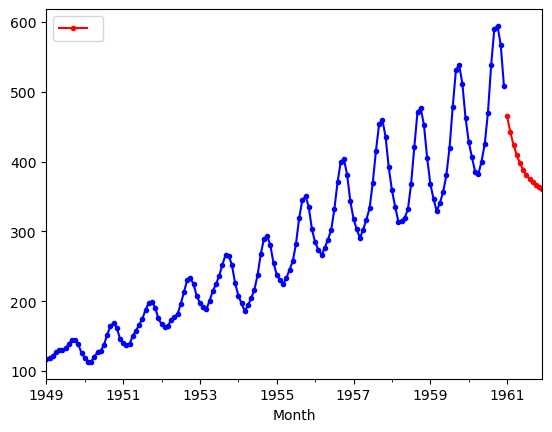

In [20]:
fit3.fittedvalues.plot(marker='.', color='b')
fcast3.plot(color='r', marker='.', legend=True)

### Holt Winters

In [21]:
fit4 = ExponentialSmoothing(data, seasonal_periods=12,
                            trend='additive', seasonal='additive', use_boxcox=True).fit() #note que usamos tendencia aditiva e sazonalidade aditiva

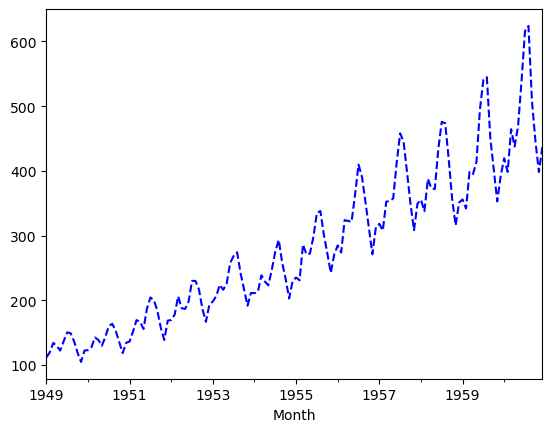

In [22]:
fit4.fittedvalues.plot(style='--', color='b')
plt.show()

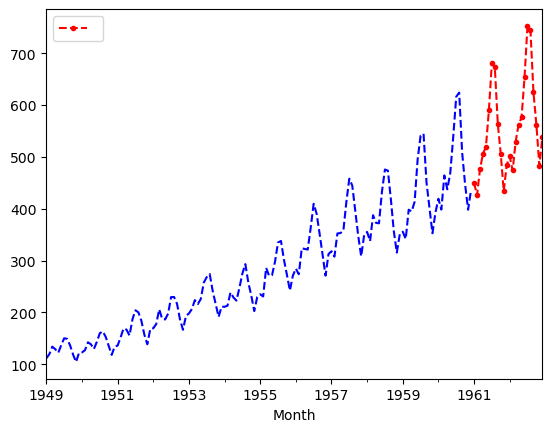

In [23]:
fit4.forecast(24).plot(style='--', marker='.', color='r', legend=True)
fit4.fittedvalues.plot(style='--', color='b')
plt.show()